In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np

In [24]:
df_origin = pd.read_csv('train.csv')
final_df = pd.read_csv('df_final.csv')

In [25]:
del final_df['zipcode']

In [26]:
from sklearn.preprocessing import MinMaxScaler
features=['median_home_value','distance_to_center','time_since_last_review','host_since_day','number_of_reviews']
# Perform min-max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(final_df[features])

# Create a new DataFrame with scaled features
data_scaled = pd.DataFrame(data_scaled,columns=features)
final_df[features]=data_scaled
final_df.head()


,log_price,cleaning_fee,host_has_profile_pic,host_identity_verified,instant_bookable,number_of_reviews,thumbnail_url,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,...,LA,NYC,SF,time_since_last_review,host_since_day,super_host,median_home_value,lat_center,long_center,distance_to_center
0,5.010635,1,1,1,0,0.184220,1,1,0,0,...,0,1,0,0.483084,0.576242,0,0.748624,40.7200,-74.0060,0.179495
1,5.129899,1,1,0,1,0.326299,1,1,0,0,...,0,1,0,0.401436,0.030554,0,0.860864,40.7200,-74.0060,0.243939
2,4.976734,1,1,1,1,0.402090,1,1,0,0,...,0,1,0,0.403137,0.098230,0,0.787699,40.7200,-74.0060,0.367405
3,6.620073,1,1,1,0,0.000000,1,0,0,0,...,0,0,1,0.000000,0.256710,0,0.937492,37.7749,-122.4194,0.117210
4,4.744932,1,1,1,1,0.269878,0,1,0,0,...,0,0,0,0.447552,0.270702,0,0.633364,38.9072,-77.0369,0.145208


In [27]:
del final_df['lat_center']
del final_df['long_center']

In [28]:
X = final_df.drop(['log_price'], axis =1)
#X=final_df[important_columns]
y = final_df.log_price

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [30]:
cbr = CatBoostRegressor()
cbr.fit(x_train, y_train)
y_pred_cbr = cbr.predict(x_test)
mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)
print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.078012
0:	learn: 0.6793707	total: 13.9ms	remaining: 13.9s
1:	learn: 0.6531686	total: 23.6ms	remaining: 11.8s
2:	learn: 0.6298211	total: 31.5ms	remaining: 10.5s
3:	learn: 0.6085122	total: 43.5ms	remaining: 10.8s
4:	learn: 0.5897786	total: 55.3ms	remaining: 11s
5:	learn: 0.5726322	total: 66.7ms	remaining: 11.1s
6:	learn: 0.5578378	total: 76.8ms	remaining: 10.9s
7:	learn: 0.5442041	total: 86.6ms	remaining: 10.7s
8:	learn: 0.5323337	total: 98.1ms	remaining: 10.8s
9:	learn: 0.5219385	total: 108ms	remaining: 10.7s
10:	learn: 0.5127616	total: 119ms	remaining: 10.7s
11:	learn: 0.5046318	total: 128ms	remaining: 10.5s
12:	learn: 0.4975910	total: 138ms	remaining: 10.5s
13:	learn: 0.4911456	total: 148ms	remaining: 10.4s
14:	learn: 0.4854025	total: 157ms	remaining: 10.3s
15:	learn: 0.4801981	total: 167ms	remaining: 10.3s
16:	learn: 0.4757702	total: 177ms	remaining: 10.2s
17:	learn: 0.4720279	total: 187ms	remaining: 10.2s
18:	learn: 0.4684600	total: 196ms	remaining: 10.1s
19:	

In [31]:
feature_importances = cbr.feature_importances_

In [32]:

sorted_feature_importances = sorted(zip(feature_importances, X.columns), reverse=True)
important_columns = [feature_name for importance, feature_name in sorted_feature_importances if importance > 0.2]
len(important_columns)

43

In [33]:
X = final_df[important_columns]
y = final_df.log_price

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
cbr = CatBoostRegressor()
cbr.fit(x_train, y_train)
y_pred_cbr = cbr.predict(x_test)
mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)
print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)

Learning rate set to 0.078012
0:	learn: 0.6793091	total: 7.91ms	remaining: 7.9s
1:	learn: 0.6524679	total: 15.8ms	remaining: 7.86s
2:	learn: 0.6281327	total: 22.3ms	remaining: 7.42s
3:	learn: 0.6070151	total: 30.5ms	remaining: 7.58s
4:	learn: 0.5879375	total: 37.4ms	remaining: 7.43s
5:	learn: 0.5713956	total: 44.2ms	remaining: 7.33s
6:	learn: 0.5565718	total: 52ms	remaining: 7.38s
7:	learn: 0.5433336	total: 58.9ms	remaining: 7.3s
8:	learn: 0.5317590	total: 67.1ms	remaining: 7.39s
9:	learn: 0.5217305	total: 73.9ms	remaining: 7.32s
10:	learn: 0.5127858	total: 81.9ms	remaining: 7.36s
11:	learn: 0.5046286	total: 88.7ms	remaining: 7.3s
12:	learn: 0.4976288	total: 98.7ms	remaining: 7.49s
13:	learn: 0.4913030	total: 111ms	remaining: 7.82s
14:	learn: 0.4855848	total: 122ms	remaining: 7.98s
15:	learn: 0.4805380	total: 132ms	remaining: 8.14s
16:	learn: 0.4757782	total: 141ms	remaining: 8.14s
17:	learn: 0.4717102	total: 150ms	remaining: 8.17s
18:	learn: 0.4678864	total: 158ms	remaining: 8.16s
19:

In [ ]:
'''param_grid = {
    'iterations': [500,1000,2000],  # Number of boosting iterations
    'learning_rate': [0.02,0.04,0.06],  # learning rate
    'depth': [4,9,10]  # tree depth
    #'min_data_in_leaf': [10]  # Minimum number of samples to split trees
}
# Create the CatBoostRegressor model
cat_model = CatBoostRegressor(random_seed=42)
# Perform Grid Search
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=10)
grid_search.fit(x_train, y_train, verbose=2)
# Show the best parameters and result
print("The best parameters:", grid_search.best_params_)
print("The best R2 score:", grid_search.best_score_)'''


In [ ]:
'''print("The best parameters:", grid_search.best_params_)
print("The best R2 score:", grid_search.best_score_)'''

The best parameters: {'depth': 9, 'iterations': 2000, 'learning_rate': 0.04}
The best R2 score: 0.7083603192954572


In [ ]:

cat_tuned = CatBoostRegressor(  learning_rate = 0.04,  
                                depth = 9, 
                                iterations= 2000,
                                )

cat_tuned = cat_tuned.fit(x_train,y_train)
y_pred = cat_tuned.predict(x_test)

0:	learn: 0.7088352	total: 26.3ms	remaining: 3m 30s
1:	learn: 0.7084222	total: 53.2ms	remaining: 3m 32s
2:	learn: 0.7080128	total: 74.9ms	remaining: 3m 19s
3:	learn: 0.7076147	total: 95.1ms	remaining: 3m 10s
4:	learn: 0.7072137	total: 115ms	remaining: 3m 4s
5:	learn: 0.7068035	total: 134ms	remaining: 2m 58s
6:	learn: 0.7064046	total: 154ms	remaining: 2m 56s
7:	learn: 0.7059996	total: 176ms	remaining: 2m 55s
8:	learn: 0.7055957	total: 205ms	remaining: 3m 1s
9:	learn: 0.7051977	total: 226ms	remaining: 3m
10:	learn: 0.7047937	total: 246ms	remaining: 2m 58s
11:	learn: 0.7043975	total: 267ms	remaining: 2m 57s
12:	learn: 0.7039900	total: 287ms	remaining: 2m 56s
13:	learn: 0.7035938	total: 303ms	remaining: 2m 52s
14:	learn: 0.7032015	total: 320ms	remaining: 2m 50s
15:	learn: 0.7028001	total: 336ms	remaining: 2m 47s
16:	learn: 0.7023996	total: 353ms	remaining: 2m 45s
17:	learn: 0.7020030	total: 372ms	remaining: 2m 44s
18:	learn: 0.7016097	total: 389ms	remaining: 2m 43s
19:	learn: 0.7012203	tot

In [ ]:
mae  = metrics.mean_absolute_error(y_test, y_pred)
mse  = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2   = metrics.r2_score(y_test, y_pred)


print('\nMean Absolute Error of Gradient Boosting     : ', mae)
print('\nMean Squarred Error of Gradient Boosting     : ', mse)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse)
print('\nR2 Score of Gradient Boosting                : ', r2)


Mean Absolute Error of Gradient Boosting     :  0.29445186815315594

Mean Squarred Error of Gradient Boosting     :  0.15757896622985432

Root Mean Squarred Error of Gradient Boosting:  0.39696217229082964

R2 Score of Gradient Boosting                :  0.68548202174078


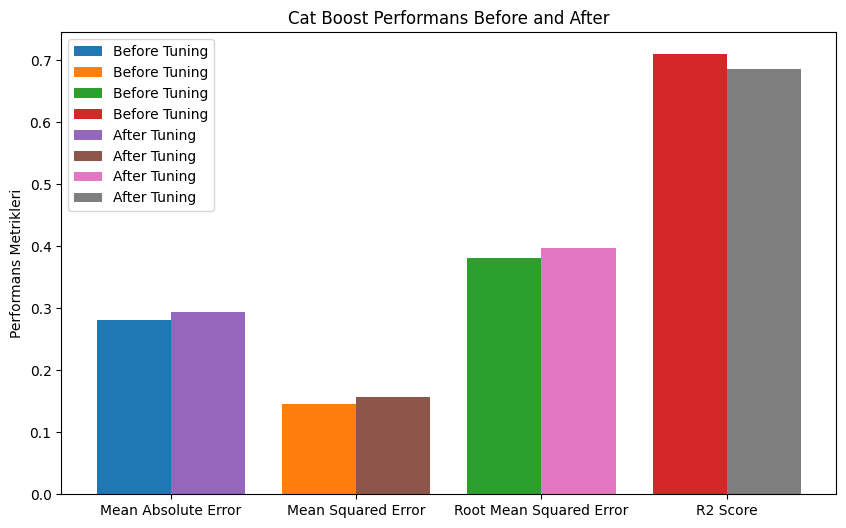

In [37]:
import matplotlib.pyplot as plt

# Performans metrikleri ve algoritma isimleri
metrics = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R2 Score"]
before_tuning_scores = [0.28109784480594857, 0.1456346549389789, 0.381621088173831, 0.7093221365021952]
after_tuning_scores = [0.29445186815315594, 0.15757896622985432, 0.39696217229082964, 0.68548202174078]

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Önceki durum çubukları
for i in range(len(metrics)):
    plt.bar(i - 0.2, before_tuning_scores[i], width=0.4, align='center', label='Before Tuning')

# Ayarlandıktan sonraki durum çubukları
for i in range(len(metrics)):
    plt.bar(i + 0.2, after_tuning_scores[i], width=0.4, align='center', label='After Tuning')

plt.xticks(range(len(metrics)), metrics)
plt.ylabel("Performans Metrikleri")
plt.legend(loc='best')
plt.title("Cat Boost Performans Before and After")
plt.show()
